In [13]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt 

In [14]:
df = pd.read_csv("dataset1.csv")

In [15]:
df = df.loc[df['Protocol'] == "DNS"]

In [16]:
data=[]
tot = 0
for x in df["Info"]:
    tot+=1
    if "CNAME" in x:
        data.append(x.split("CNAME")[1].split(" ")[1])
    elif "AAAA" in x:
        data.append(x.split("AAAA")[1].split(" ")[1])
    elif "A" in x:
        data.append(x.split("A")[1].split(" ")[1]) 
    elif "TXT" in x:
        data.append(x.split("TXT")[1].split(" ")[1]) 
    elif "MX" in x:
        data.append(x.split("MX")[1].split(" ")[1])

In [17]:
c = Counter( data )
common=[]
for val in c.most_common():
    if val[1] >=15:
        common.append(val[0])
lis= []
cache_miss=[]
parts=[]
for x in data:
    x=x.strip()

    if x not in lis:
        cache_miss.append(1)
        lis.append(x)
    else:
        cache_miss.append(0)

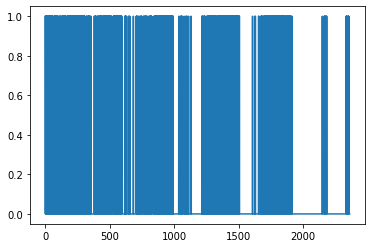

In [18]:
x = cache_miss
y=[]
for i in range(len(x)):
    y.append(i)

plt.plot(y,x) 
plt.show()

In [19]:
parts=[]
total=0
attack=0
actual=0
attack_data=[]
for i in range(len(data)):
    x=data[i]
    if cache_miss[i]==1:
        total+=1
        if "dnscat" in x:
            actual+=1
        count=0
        l1=0
        l2=0
        for p in x.split("."):
            if p not in parts:
                count+=1
                l1=l1+len(p)
            l2=l2+len(p)
        sim = count/len(x.split("."))
        sim2=l1/l2
        if sim <= 0.75 and sim2 >= 0.8 and x not in common:
            attack+=1
            attack_data.append(1)
        else:
            attack_data.append(0)
    else:
        attack_data.append(0)
                    
    for p in x.split("."):
        parts.append(p)

print(total,attack,actual)
print(total-attack, total-actual, (total-attack)*100/(total-actual))

607 444 424
163 183 89.07103825136612


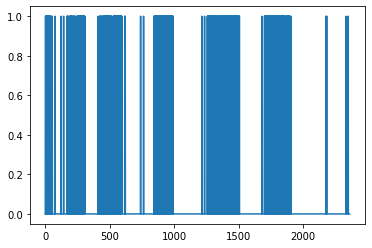

In [20]:
x = attack_data
y=[]
for i in range(len(x)):
    y.append(i)

plt.plot(y,x) 
plt.show()